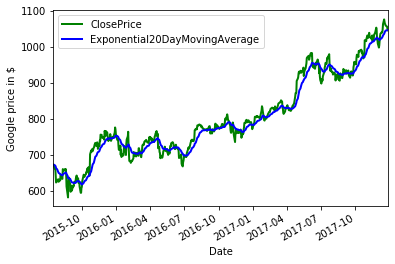

In [2]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

num_periods = 20 # number of days over which to average
ema_p = 0
ema_values = [] # to hold computed EMA values
K = 2 / (num_periods + 1)

for close_price in close:
  if (ema_p == 0): # first observation, EMA = current-price
    ema_p = close_price
  else:
    ema_p = (close_price - ema_p) * K + ema_p
  ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.savefig('ema.png')
plt.show()

In [3]:
close

Date
2015-07-17     672.929993
2015-07-20     663.020020
2015-07-21     662.299988
2015-07-22     662.099976
2015-07-23     644.280029
2015-07-24     623.559998
2015-07-27     627.260010
2015-07-28     628.000000
2015-07-29     631.929993
2015-07-30     632.590027
2015-07-31     625.609985
2015-08-03     631.210022
2015-08-04     629.250000
2015-08-05     643.780029
2015-08-06     642.679993
2015-08-07     635.299988
2015-08-10     633.729980
2015-08-11     660.780029
2015-08-12     659.559998
2015-08-13     656.450012
2015-08-14     657.119995
2015-08-17     660.869995
2015-08-18     656.130005
2015-08-19     660.900024
2015-08-20     646.830017
2015-08-21     612.479980
2015-08-24     589.609985
2015-08-25     582.059998
2015-08-26     628.619995
2015-08-27     637.609985
                 ...     
2017-11-16    1032.500000
2017-11-17    1019.090027
2017-11-20    1018.380005
2017-11-21    1034.489990
2017-11-22    1035.959961
2017-11-24    1040.609985
2017-11-27    1054.209961
2017-11

In [7]:
ema

Date
2015-07-17     672.929993
2015-07-20     671.986186
2015-07-21     671.063691
2015-07-22     670.210004
2015-07-23     667.740482
2015-07-24     663.532817
2015-07-27     660.078264
2015-07-28     657.023191
2015-07-29     654.633363
2015-07-30     652.533997
2015-07-31     649.969806
2015-08-03     648.183160
2015-08-04     646.380002
2015-08-05     646.132385
2015-08-06     645.803586
2015-08-07     644.803243
2015-08-10     643.748647
2015-08-11     645.370683
2015-08-12     646.722046
2015-08-13     647.648519
2015-08-14     648.550565
2015-08-17     649.723844
2015-08-18     650.333954
2015-08-19     651.340247
2015-08-20     650.910701
2015-08-21     647.250632
2015-08-24     641.761047
2015-08-25     636.075233
2015-08-26     635.365210
2015-08-27     635.578998
                 ...     
2017-11-16    1015.134288
2017-11-17    1015.511025
2017-11-20    1015.784261
2017-11-21    1017.565759
2017-11-22    1019.317588
2017-11-24    1021.345435
2017-11-27    1024.475390
2017-11